# Merging volumentric ROI measures and freesurfer surface measures.
- Cortical thickness/volume/aseg/wmparc data generated by "../tab_data/freesurfer_stats2table.sh" from fMRIPrep_20.2.0 freesurfer_6.0.1
- Cerebellar segmetations in both SUIT34 and MDTB10 spaces.
- Uses participants data (../tab_data/PPMI_subjects.list ADNI_subjects.list) as target to join, all NaN values droped;
## Cohorts
- PPMI NC, ADNI2 NC
## Parcellations
- Distreux
- DKT
## Results
- Distreux: ../tab_data/ADNI-PPMI_Des-cere_preped.csv
- DKT:      ../tab_data/ADNI-PPMI_DKT-cere_preped.csv

In [48]:
## Preprocessing of ADNI and PPMI dataset freesurfer outputs
#lib and path
from pathlib import Path
import pandas as pd
import seaborn as sns
data_dir = Path("/codes/tab_data")
adni_list_file = data_dir/'ADNI_subjects.list'
ppmi_list_file = data_dir/'PPMI_subjects.list'
# groups
GROUPS   = ['ADNI', 'PPMI']
n_groups = len(GROUPS)
sub_list_file = [data_dir/(x+'_subjects.list') for x in GROUPS]
sub_list = [pd.read_csv(x, sep='\t', header=0, index_col=0) for x in sub_list_file]

# reading freesurfer results
FS_DIR = data_dir/'freesurfer_output_20.2.0'
group_data={};

# output file
res_file = [data_dir/'ADNI-PPMI_Des-cere_preped.csv', data_dir/'ADNI-PPMI_DKT-cere_preped.csv']
combined_res_file = [data_dir/'freesurfer_out_preped.csv']

files_2_read={'seg': ['aseg_stats.txt', 'wmparc_stats.txt'],
              'Destrieux': {'ct': '.a2009s.thickness.txt','area':'.a2009s.area.txt', 'volume':'.a2009s.volume.txt', 'meancurv':'.a2009s.meancurv.txt'},
              'DKT': {'ct': '.DKTatlas.thickness.txt','area':'.DKTatlas.area.txt', 'volume':'.DKTatlas.volume.txt', 'meancurv':'.DKTatlas.meancurv.txt'}}

for i_group in range(n_groups):
    """
    Loop to gather all the freesurfer outputs for ET/PD/NC group.
    Output: all_data (dataframe).
    """
    print('Reading ' , GROUPS[i_group], ' freesurfer stats data...')
    # raw data path
    raw_data_path = FS_DIR/GROUPS[i_group]
    # segmentation
    subcortical_file = raw_data_path / (files_2_read['seg'][0]); wm_file = raw_data_path / 'wmparc_stats.txt'; 
    # Des parcellation
    lh_Des_ct_file = raw_data_path / ('lh'+files_2_read['Destrieux']['ct']);  rh_Des_ct_file = raw_data_path /  ('rh'+files_2_read['Destrieux']['ct']);
    lh_Des_vol_file = raw_data_path / ('lh'+files_2_read['Destrieux']['volume']); rh_Des_vol_file = raw_data_path / ('rh'+files_2_read['Destrieux']['volume']);
    lh_Des_area_file = raw_data_path / ('lh'+files_2_read['Destrieux']['area']); rh_Des_area_file = raw_data_path / ('rh'+files_2_read['Destrieux']['area']);
    lh_Des_meancurv_file = raw_data_path / ('lh'+files_2_read['Destrieux']['meancurv']); rh_Des_meancurv_file = raw_data_path / ('rh'+files_2_read['Destrieux']['meancurv']);
    # DKT parcellation
    lh_DKT_area_file = raw_data_path / ('lh'+files_2_read['DKT']['area']);       rh_DKT_area_file = raw_data_path / ('rh'+files_2_read['DKT']['area']);
    lh_DKT_ct_file = raw_data_path / ('lh'+files_2_read['DKT']['ct']);        rh_DKT_ct_file = raw_data_path /  ('rh'+files_2_read['DKT']['ct']);
    lh_DKT_vol_file = raw_data_path / ('lh'+files_2_read['DKT']['volume']);       rh_DKT_vol_file = raw_data_path / ('rh'+files_2_read['DKT']['volume']);
    lh_DKT_meancurv_file = raw_data_path / ('lh'+files_2_read['DKT']['meancurv']);       rh_DKT_meancurv_file = raw_data_path / ('rh'+files_2_read['DKT']['meancurv']);
    ## drop_list
    aseg_drop = ["EstimatedTotalIntraCranialVol"]; wm_drop = ["MaskVol", "EstimatedTotalIntraCranialVol", "CerebralWhiteMatterVol", "rhCerebralWhiteMatterVol", "lhCerebralWhiteMatterVol"];
    parc_drop = ["BrainSegVolNotVent", "eTIV"]; 
    ##
    subcortical_tab = pd.read_csv(subcortical_file, sep='\t', header=0, index_col=0); subcortical_tab.drop(aseg_drop, axis=1, inplace=True);
    res = sub_list[i_group].join(subcortical_tab, how='left');
    wm_tab = pd.read_csv(wm_file, sep='\t', header=0, index_col=0); wm_tab.drop(wm_drop, axis=1, inplace=True);
    res1   = res.join(wm_tab, how='left');
    # read Des/DKT parcelation data
    lh_Des_ct_tab = pd.read_csv(lh_Des_ct_file, sep='\t', header=0, index_col=0); lh_Des_ct_tab.drop(parc_drop, axis=1, inplace=True);
    rh_Des_ct_tab = pd.read_csv(rh_Des_ct_file, sep='\t', header=0, index_col=0); rh_Des_ct_tab.drop(parc_drop, axis=1, inplace=True);
    lh_Des_vol_tab = pd.read_csv(lh_Des_vol_file, sep='\t', header=0, index_col=0); lh_Des_vol_tab.drop(parc_drop, axis=1, inplace=True);
    rh_Des_vol_tab = pd.read_csv(rh_Des_vol_file, sep='\t', header=0, index_col=0); rh_Des_vol_tab.drop(parc_drop, axis=1, inplace=True);
    lh_DKT_ct_tab = pd.read_csv(lh_DKT_ct_file, sep='\t', header=0, index_col=0); lh_DKT_ct_tab.drop(parc_drop, axis=1, inplace=True);
    rh_DKT_ct_tab = pd.read_csv(rh_DKT_ct_file, sep='\t', header=0, index_col=0); rh_DKT_ct_tab.drop(parc_drop, axis=1, inplace=True);
    lh_DKT_vol_tab = pd.read_csv(lh_DKT_vol_file, sep='\t', header=0, index_col=0); lh_DKT_vol_tab.drop(parc_drop, axis=1, inplace=True);
    rh_DKT_vol_tab = pd.read_csv(rh_DKT_vol_file, sep='\t', header=0, index_col=0); rh_DKT_vol_tab.drop(parc_drop, axis=1, inplace=True);
    # merge Des/DKT parcelation data
    seg_Des_tab=res1.join(lh_Des_ct_tab, how='left'); seg_Des_tab=seg_Des_tab.join(rh_Des_ct_tab, how='left'); seg_Des_tab=seg_Des_tab.join(lh_Des_vol_tab,how='left'); seg_Des_tab=seg_Des_tab.join(rh_Des_vol_tab,how='left'); 
    seg_DKT_tab=res1.join(lh_DKT_ct_tab, how='left'); seg_DKT_tab=seg_DKT_tab.join(rh_DKT_ct_tab, how='left'); seg_DKT_tab=seg_DKT_tab.join(lh_DKT_vol_tab,how='left'); seg_DKT_tab=seg_DKT_tab.join(rh_DKT_vol_tab,how='left'); 
    # update group
    seg_Des_tab['group']=GROUPS[i_group]; seg_Des_tab=seg_Des_tab.dropna();
    seg_DKT_tab['group']=GROUPS[i_group]; seg_DKT_tab=seg_DKT_tab.dropna();
    # return data
    group_data[GROUPS[i_group]]={'Des': seg_Des_tab, 'DKT':seg_DKT_tab}
all_data = {'Des': pd.concat([group_data['ADNI']['Des'], group_data['PPMI']['Des']]), 'DKT': pd.concat([group_data['ADNI']['DKT'], group_data['PPMI']['DKT']])}
for x in GROUPS:
    print(x , len(group_data[x]['Des']))

Reading  ADNI  freesurfer stats data...
Reading  PPMI  freesurfer stats data...
ADNI 110
PPMI 116


In [31]:
##Fixing all the format problems: 1. All '-' are replaced by '_'; 
seg_col =[x for x in subcortical_tab.columns];
wm_col  =[x for x in wm_tab.columns]
lh_des_ct_col=[x for x in lh_Des_ct_tab.columns]; rh_des_ct_col=[x for x in rh_Des_ct_tab.columns];
lh_dkt_ct_col=[x for x in lh_DKT_ct_tab.columns]; rh_dkt_ct_col=[x for x in rh_DKT_ct_tab.columns];
lh_des_vol_col=[x for x in lh_Des_vol_tab.columns]; rh_des_vol_col=[x for x in rh_Des_vol_tab.columns];
lh_dkt_vol_col=[x for x in lh_DKT_vol_tab.columns]; rh_dkt_vol_col=[x for x in rh_DKT_vol_tab.columns];
import matplotlib.pyplot as plt
#all_data['Des'][lh_des_ct_col+rh_des_ct_col]
seg_col

['Left-Lateral-Ventricle',
 'Left-Inf-Lat-Vent',
 'Left-Cerebellum-White-Matter',
 'Left-Cerebellum-Cortex',
 'Left-Thalamus-Proper',
 'Left-Caudate',
 'Left-Putamen',
 'Left-Pallidum',
 '3rd-Ventricle',
 '4th-Ventricle',
 'Brain-Stem',
 'Left-Hippocampus',
 'Left-Amygdala',
 'CSF',
 'Left-Accumbens-area',
 'Left-VentralDC',
 'Left-vessel',
 'Left-choroid-plexus',
 'Right-Lateral-Ventricle',
 'Right-Inf-Lat-Vent',
 'Right-Cerebellum-White-Matter',
 'Right-Cerebellum-Cortex',
 'Right-Thalamus-Proper',
 'Right-Caudate',
 'Right-Putamen',
 'Right-Pallidum',
 'Right-Hippocampus',
 'Right-Amygdala',
 'Right-Accumbens-area',
 'Right-VentralDC',
 'Right-vessel',
 'Right-choroid-plexus',
 '5th-Ventricle',
 'WM-hypointensities',
 'Left-WM-hypointensities',
 'Right-WM-hypointensities',
 'non-WM-hypointensities',
 'Left-non-WM-hypointensities',
 'Right-non-WM-hypointensities',
 'Optic-Chiasm',
 'CC_Posterior',
 'CC_Mid_Posterior',
 'CC_Central',
 'CC_Mid_Anterior',
 'CC_Anterior',
 'BrainSegVol',

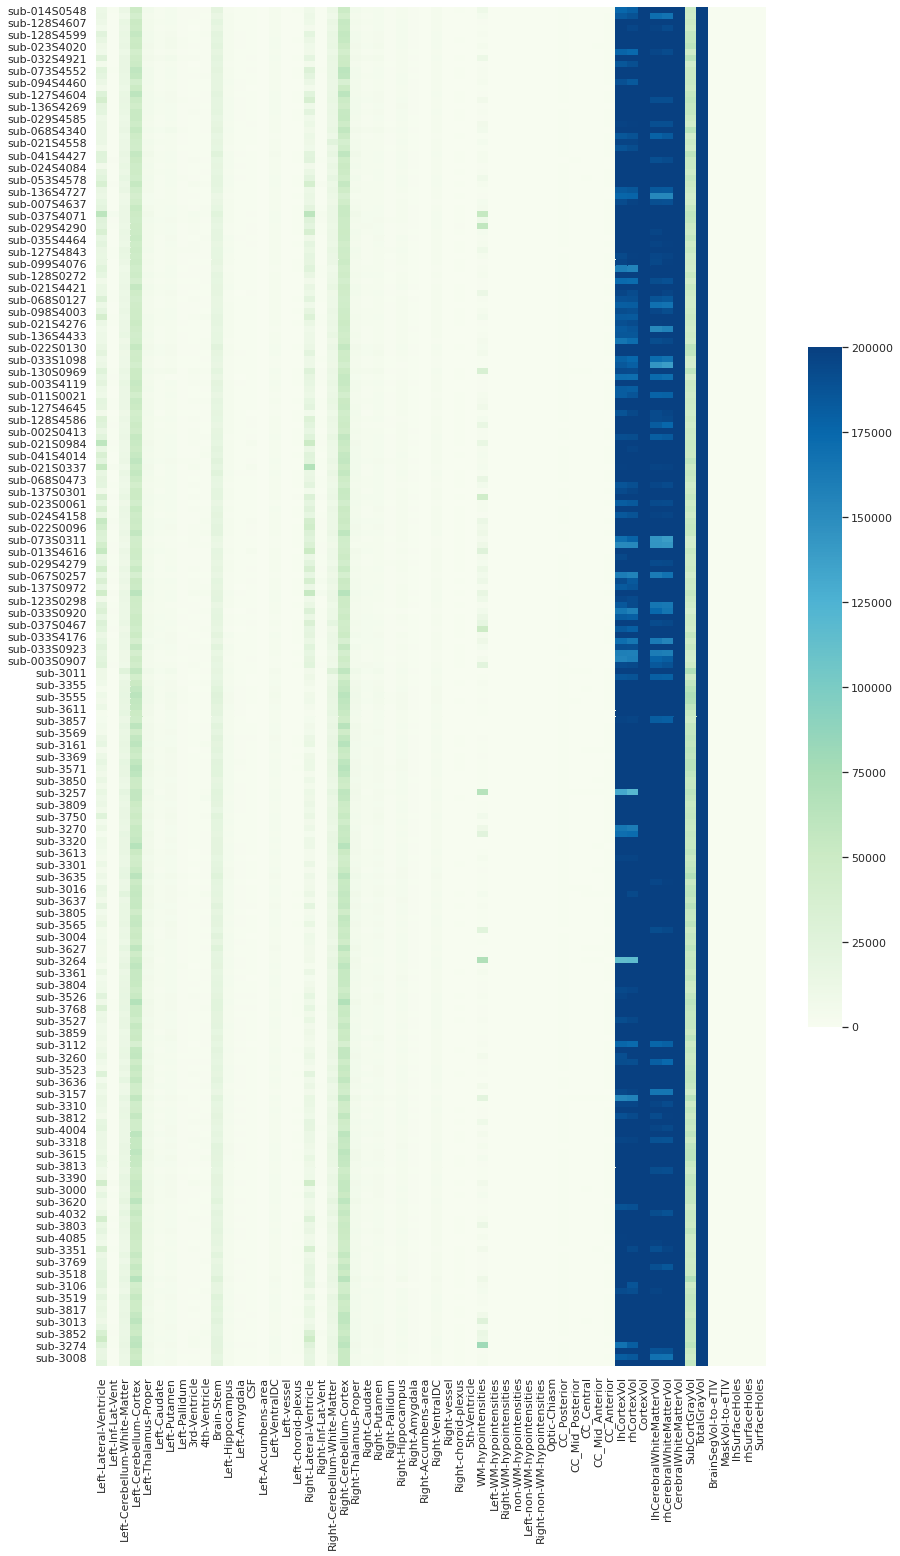

In [45]:
#seg_col-['BrainSegVolNotVent', 'SupraTentorialVolNotVent', 'SupraTentorialVolNotVentVox']
vis_list=seg_col
[ vis_list.remove(x) for x in ['BrainSegVolNotVent', 'SupraTentorialVolNotVent', 'SupraTentorialVolNotVentVox', 'MaskVol','BrainSegVol','BrainSegVolNotVentSurf','SupraTentorialVol'] if x in vis_list ]
plot_df = all_data['Des'].copy()
# sort by age
plot_df = plot_df.sort_values(['group','age'])
plot_df = plot_df[vis_list]
sns.set(font_scale=1)
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(15, 25))
    #sns.color_palette("cubehelix", as_cmap=True)
    g = sns.heatmap(plot_df,cbar_kws={"shrink": .5}, cmap="GnBu",vmin=0, vmax=200000)
    plt.axvline(len(lh_des_ct_col), ls='--',c='white')

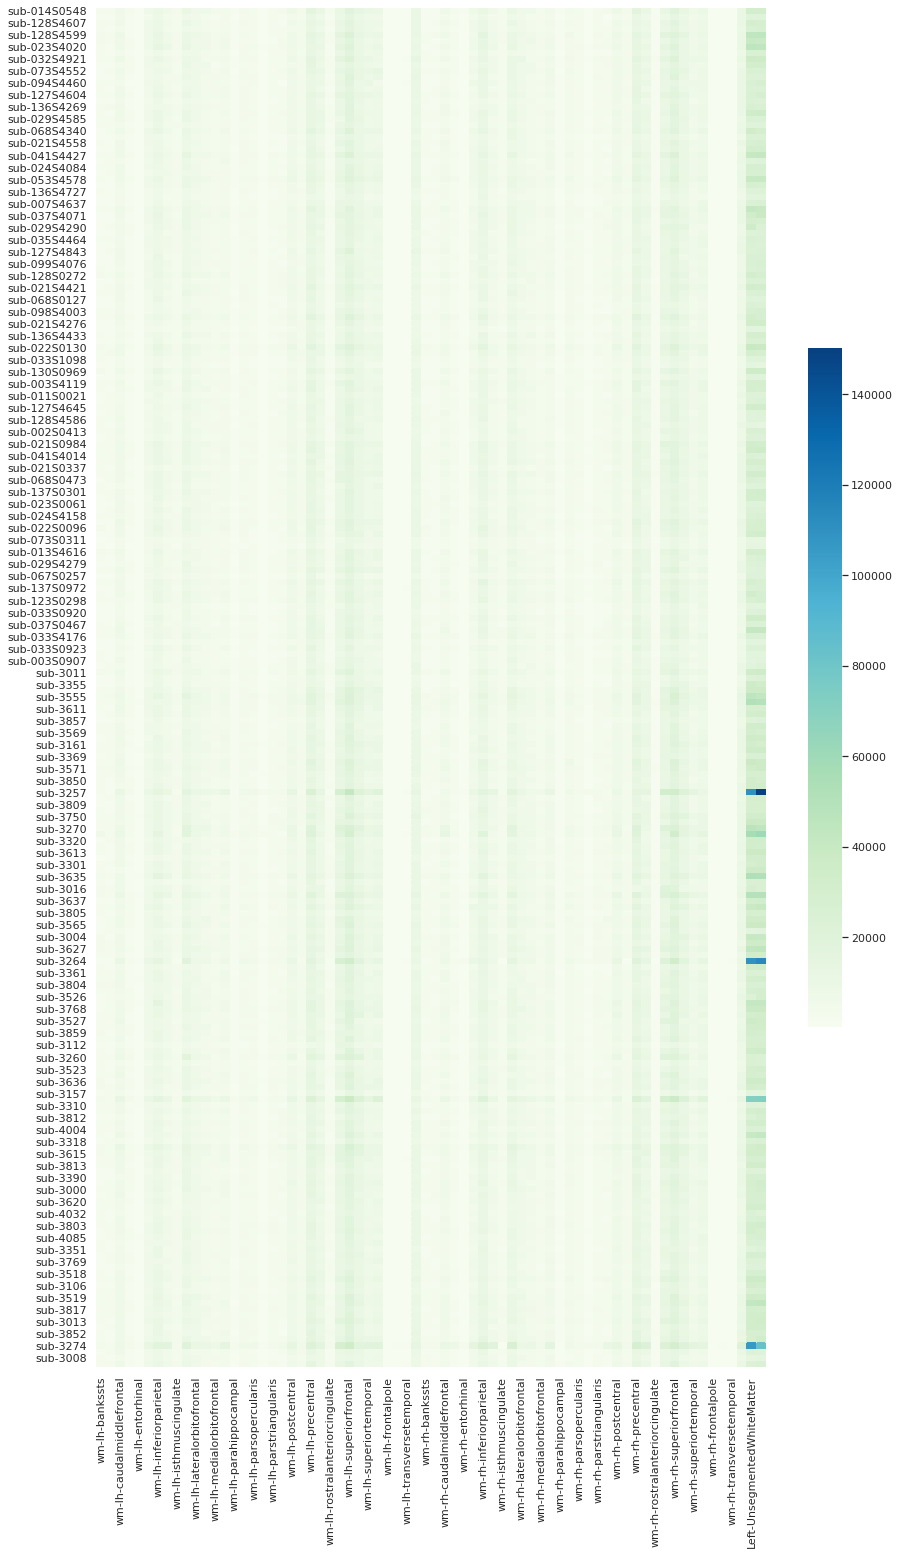

In [30]:
plot_df = all_data['Des'].copy()
# sort by age
plot_df = plot_df.sort_values(['group','age'])
plot_df = plot_df[wm_col]
sns.set(font_scale=1)
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(15, 25))
    #sns.color_palette("cubehelix", as_cmap=True)
    g = sns.heatmap(plot_df,cbar_kws={"shrink": .5}, cmap="GnBu")
    plt.axvline(len(lh_des_ct_col), ls='--',c='white')

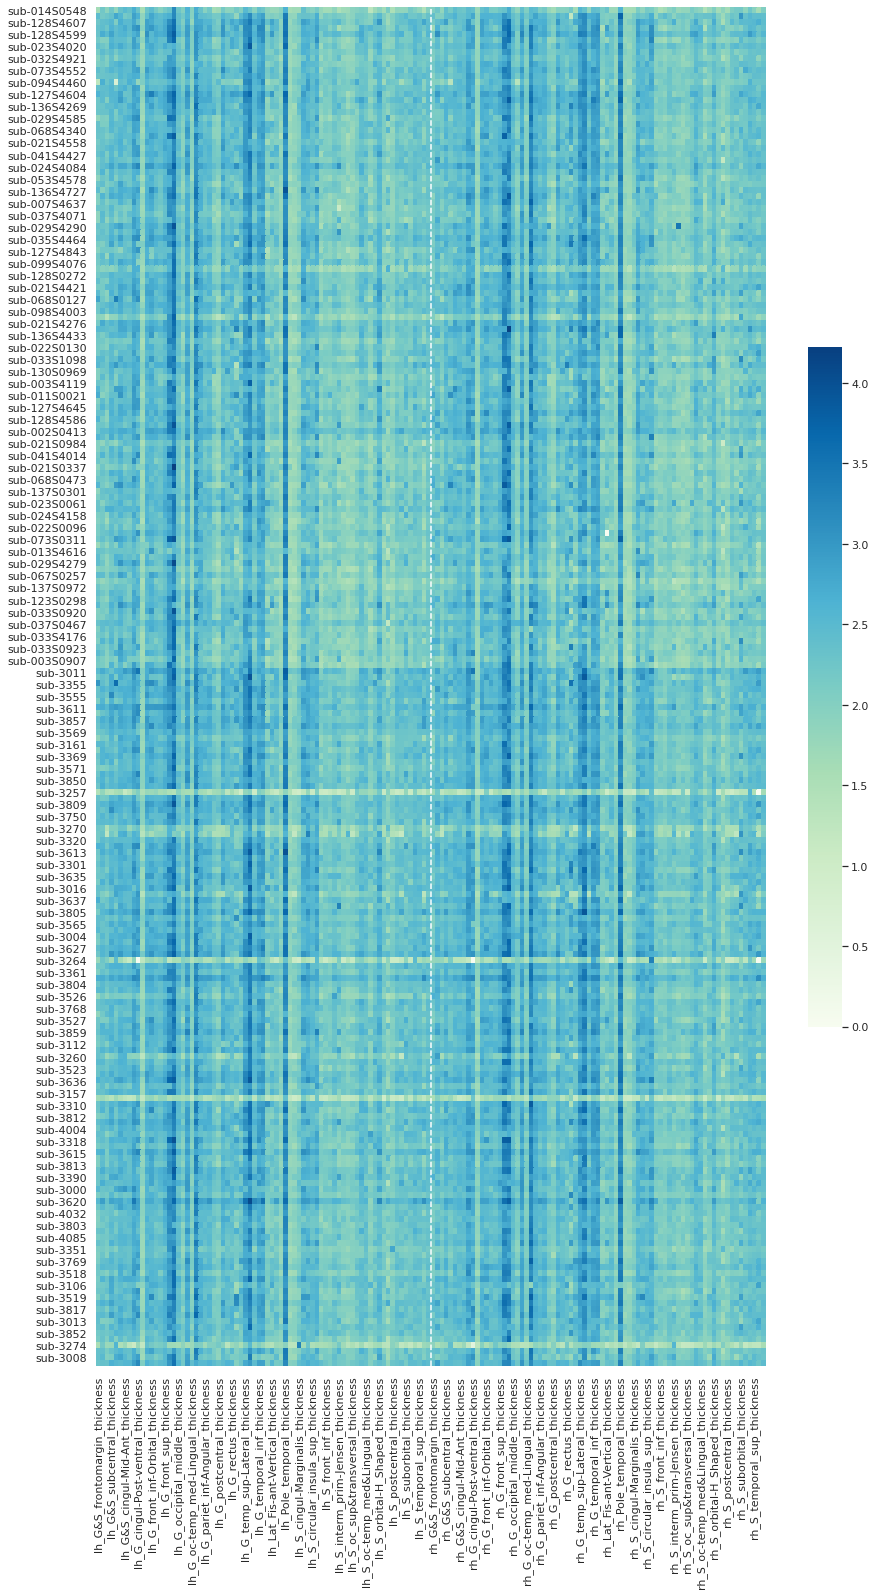

In [25]:
#suit_res_dfs[1].columns
plot_df = all_data['Des'].copy()
# sort by age
plot_df = plot_df.sort_values(['group','age'])
plot_df = plot_df[lh_des_ct_col + rh_des_ct_col ]
sns.set(font_scale=1)
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(15, 25))
    #sns.color_palette("cubehelix", as_cmap=True)
    g = sns.heatmap(plot_df,cbar_kws={"shrink": .5}, cmap="GnBu")
    plt.axvline(len(lh_des_ct_col), ls='--',c='white')

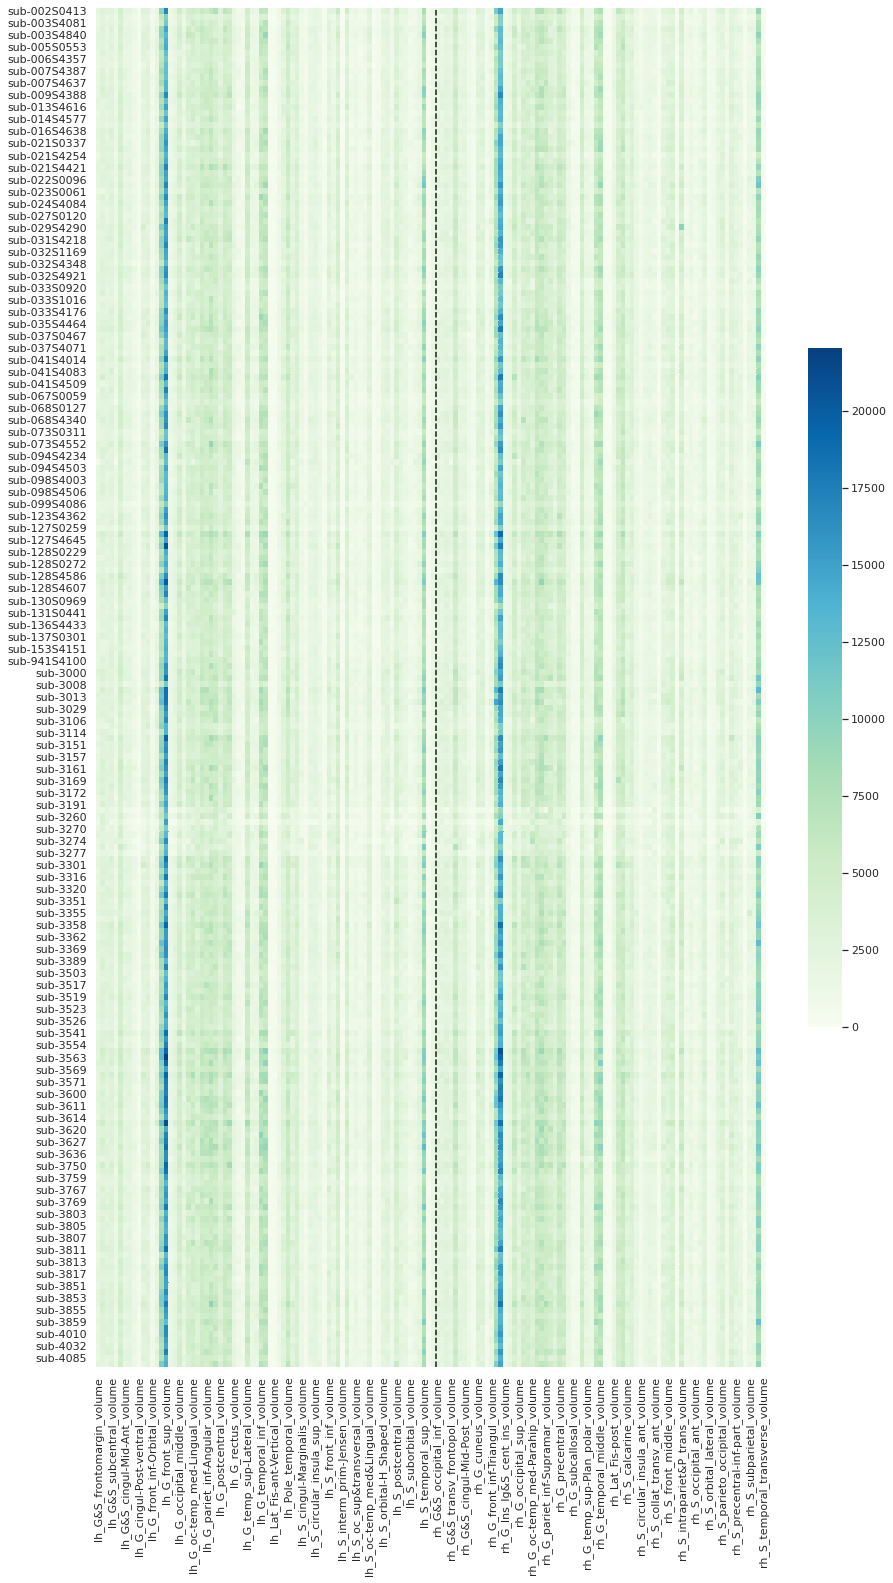

In [28]:
plot_df = all_data['Des'][lh_des_vol_col + rh_des_vol_col ]
sns.set(font_scale=1)
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(15, 25))
    #sns.color_palette("cubehelix", as_cmap=True)
    g = sns.heatmap(plot_df,cbar_kws={"shrink": .5}, cmap="GnBu")
    plt.axvline(len(lh_des_ct_col), ls='--',c='k')

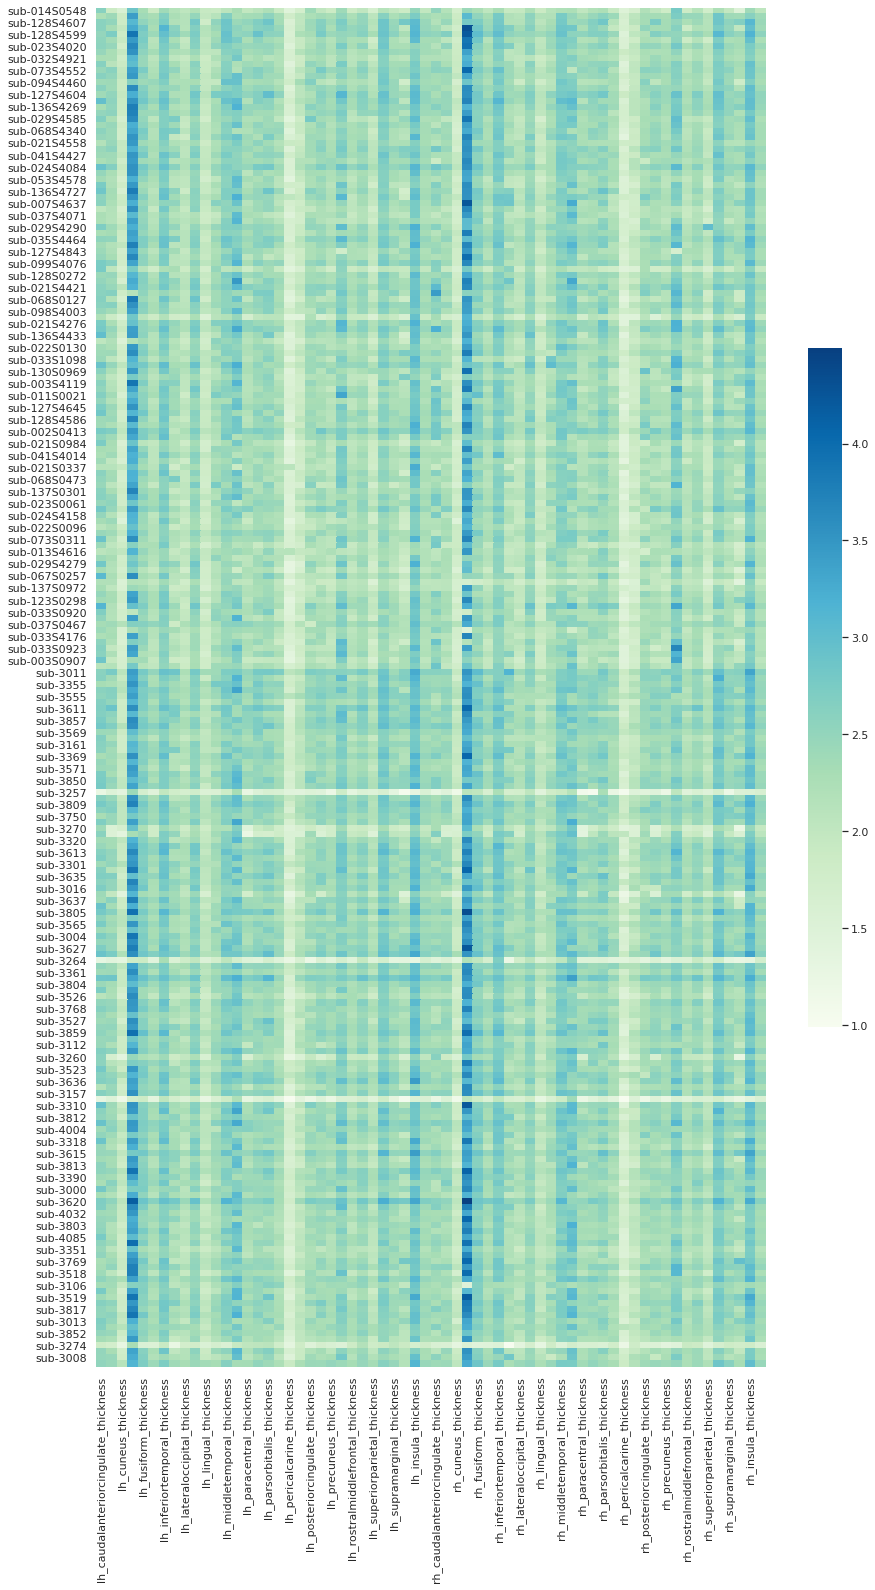

In [43]:
plot_df = all_data['DKT'].copy()
vis_list=lh_dkt_ct_col + rh_dkt_ct_col;
# sort by age
plot_df = plot_df.sort_values(['group','age'])
plot_df = plot_df[vis_list]
sns.set(font_scale=1)
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(15, 25))
    #sns.color_palette("cubehelix", as_cmap=True)
    g = sns.heatmap(plot_df,cbar_kws={"shrink": .5}, cmap="GnBu")
    plt.axvline(len(lh_des_ct_col), ls='--',c='white')

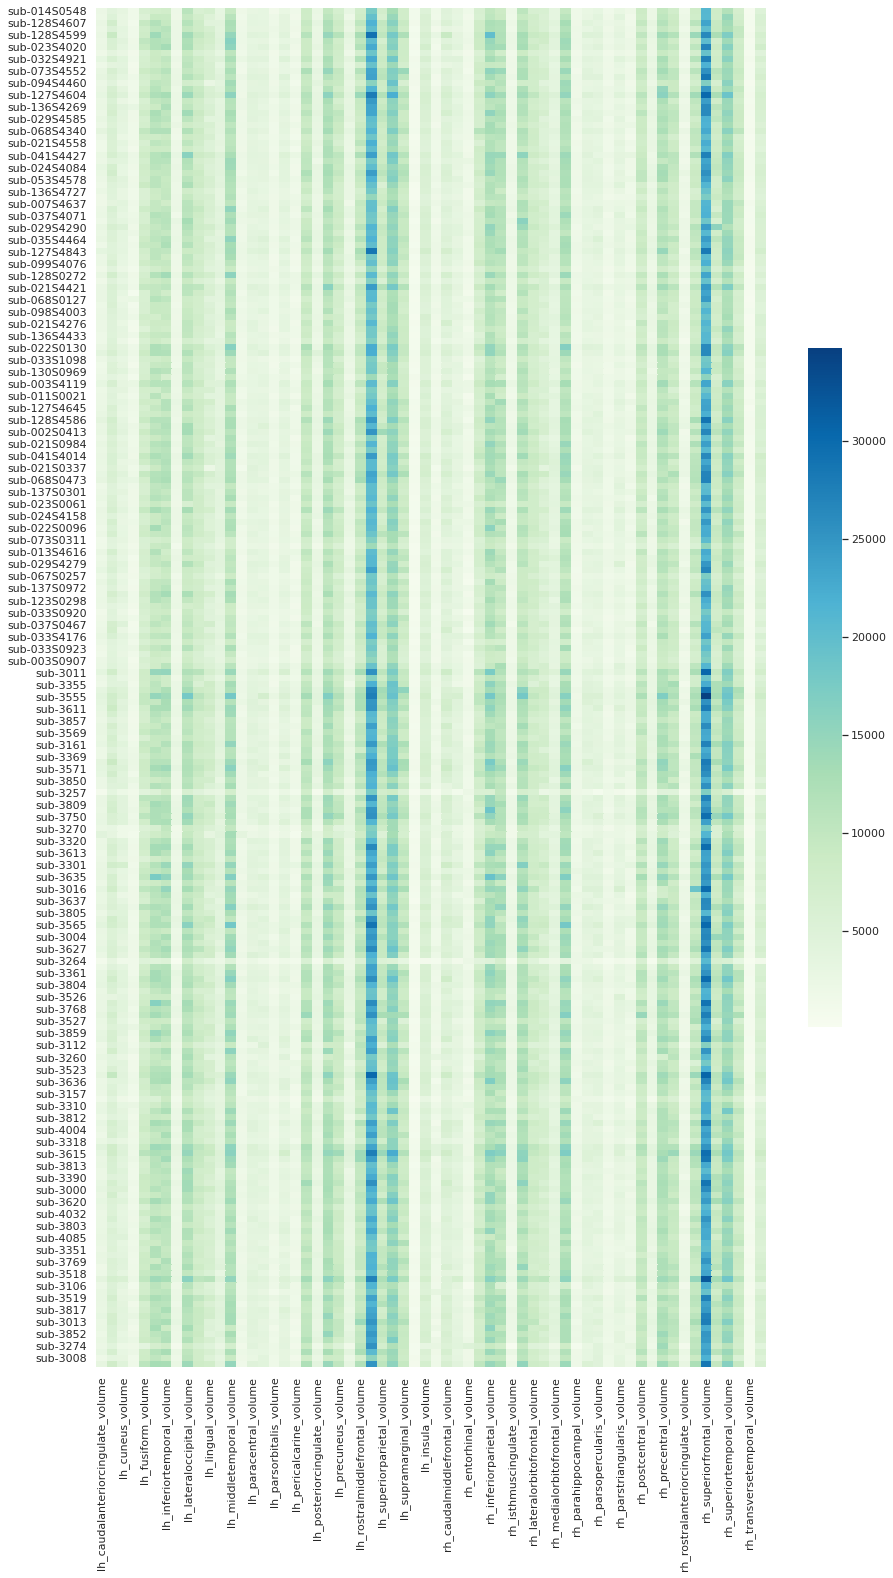

In [44]:
plot_df = all_data['DKT'].copy()
vis_list=lh_dkt_vol_col + rh_dkt_vol_col;
# sort by age
plot_df = plot_df.sort_values(['group','age'])
plot_df = plot_df[vis_list]
sns.set(font_scale=1)
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(15, 25))
    #sns.color_palette("cubehelix", as_cmap=True)
    g = sns.heatmap(plot_df,cbar_kws={"shrink": .5}, cmap="GnBu")
    plt.axvline(len(lh_des_ct_col), ls='--',c='white')

In [49]:
## adding cerebellar measures from SUIT software in both SUIT space and MDTB space.
# read SUIT space label
suit_label_file=data_dir/'atlas'/'Lobules-SUIT.nii.lut'
suit_label_df  =pd.read_csv(suit_label_file, sep=' ', header=None, index_col=None); 
suit_res_files = [data_dir/('res_'+x+'_SUIT34.csv') for x in GROUPS]
suit_res_dfs = [pd.read_csv(x, sep=',', header=None, index_col=None) for x in suit_res_files]
suit_drop_list=[[],[61]]; # cerebellar droplist for ADNI and PPMI

# read MDTB space
MDTB_res_files= [data_dir/('res_'+x+'_MDTB10.csv') for x in GROUPS]
MDTB_res_dfs  = [pd.read_csv(x, sep=',', header=None, index_col=None) for x in MDTB_res_files]
for i_group in range(n_groups):
    suit_res_dfs[i_group]=suit_res_dfs[i_group].drop(axis=0,index=suit_drop_list[i_group])
    suit_res_dfs[i_group].columns=suit_label_df.iloc[:,7]; 
    suit_res_dfs[i_group].index=group_data[GROUPS[i_group]]['Des'].index;
    suit_res_dfs[i_group]['suit_total']=suit_res_dfs[i_group].sum(axis=1)
    MDTB_res_dfs[i_group]=MDTB_res_dfs[i_group].drop(axis=0,index=suit_drop_list[i_group])
    MDTB_res_dfs[i_group].columns=['MDTB_'+str(x+1) for x in range(10)];
    MDTB_res_dfs[i_group].index=group_data[GROUPS[i_group]]['Des'].index;
    MDTB_res_dfs[i_group]['MDTB_total']=MDTB_res_dfs[i_group].sum(axis=1)
suit_merge=pd.concat(suit_res_dfs); MDTB_merge=pd.concat(MDTB_res_dfs);
cereb_merge=suit_merge.join(MDTB_merge, how='left' );
all_data['Des'] = all_data['Des'].join(cereb_merge, how='left'); all_data['Des']=all_data['Des'].dropna();
all_data['DKT'] = all_data['DKT'].join(cereb_merge, how='left'); all_data['DKT']=all_data['DKT'].dropna();
#for k, v in all_data.items():
#    v.index   = [x.replace('-','_') for x in v.index]
#    v.columns = [x.replace('-','_') for x in v.columns]

In [52]:
suit_col =[x for x in suit_merge.columns];
mdtb_col =[x for x in MDTB_merge.columns];

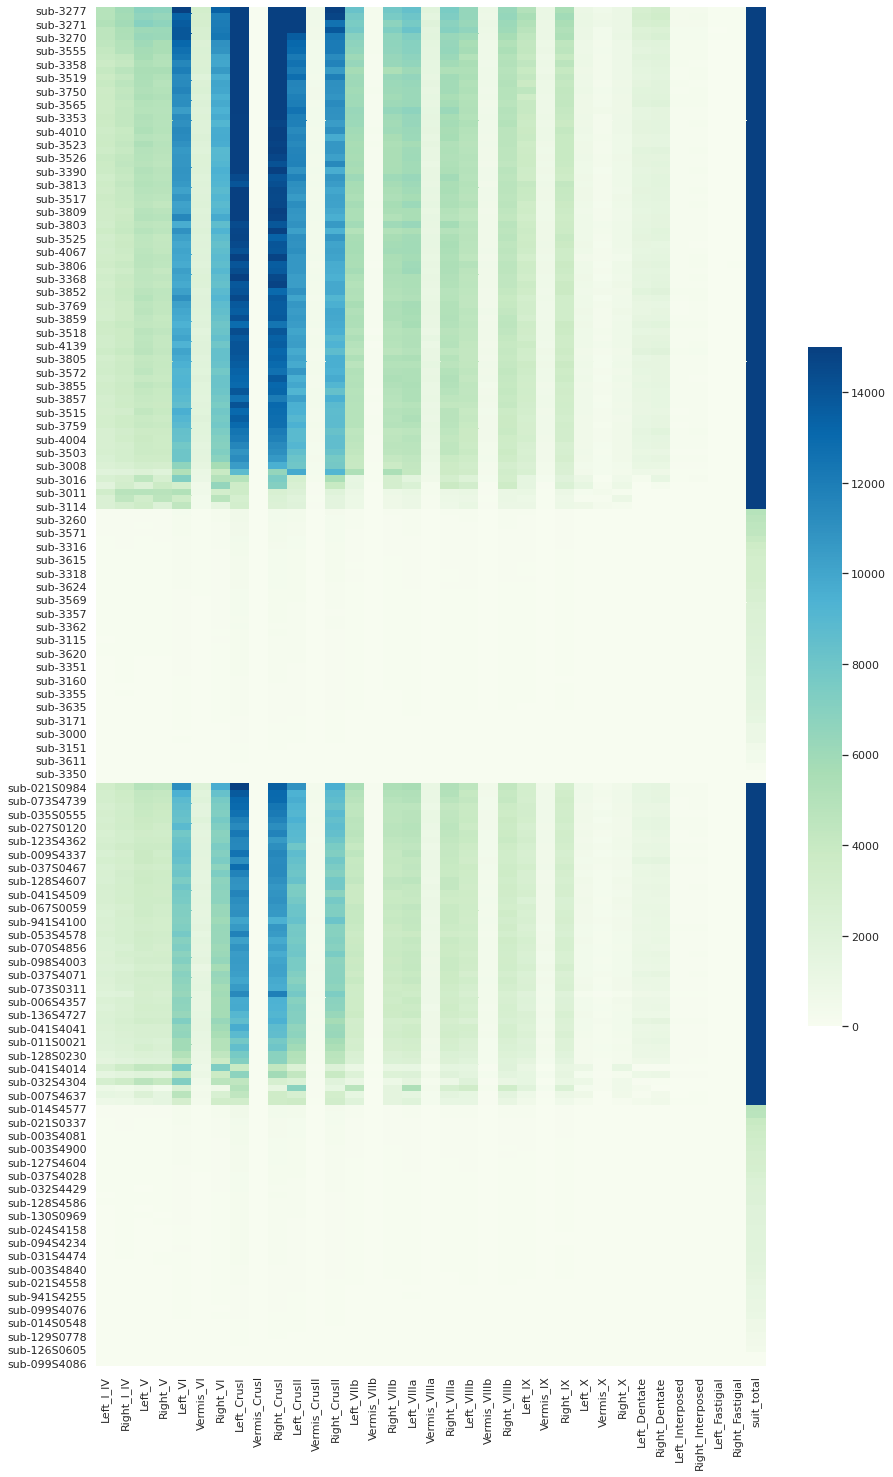

In [63]:
plot_df = all_data['DKT'].copy()
vis_list=suit_col;
# sort by age
plot_df = plot_df.sort_values(['group','suit_total','age'], ascending=False)
plot_df = plot_df[vis_list]
sns.set(font_scale=1)
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(15, 25))
    #sns.color_palette("cubehelix", as_cmap=True)
    g = sns.heatmap(plot_df,cbar_kws={"shrink": .5}, cmap="GnBu", vmin=0, vmax=15000)
    plt.axvline(len(lh_des_ct_col), ls='--',c='white')

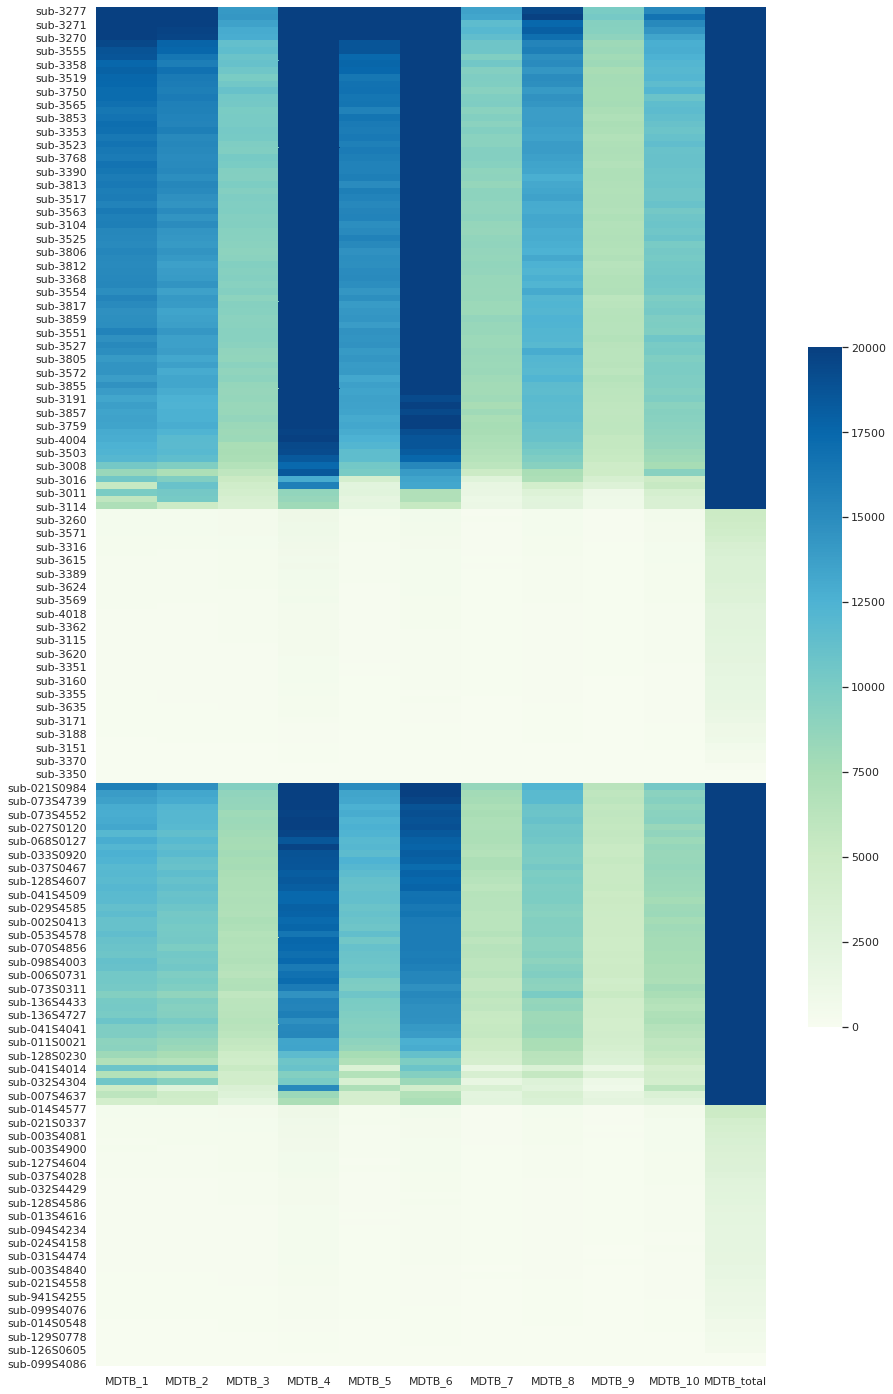

In [64]:
plot_df = all_data['DKT'].copy()
vis_list=mdtb_col;
# sort by age
plot_df = plot_df.sort_values(['group','MDTB_total','age'], ascending=False)
plot_df = plot_df[vis_list]
sns.set(font_scale=1)
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(15, 25))
    #sns.color_palette("cubehelix", as_cmap=True)
    g = sns.heatmap(plot_df,cbar_kws={"shrink": .5}, cmap="GnBu", vmin=0, vmax=20000)
    plt.axvline(len(lh_des_ct_col), ls='--',c='white')

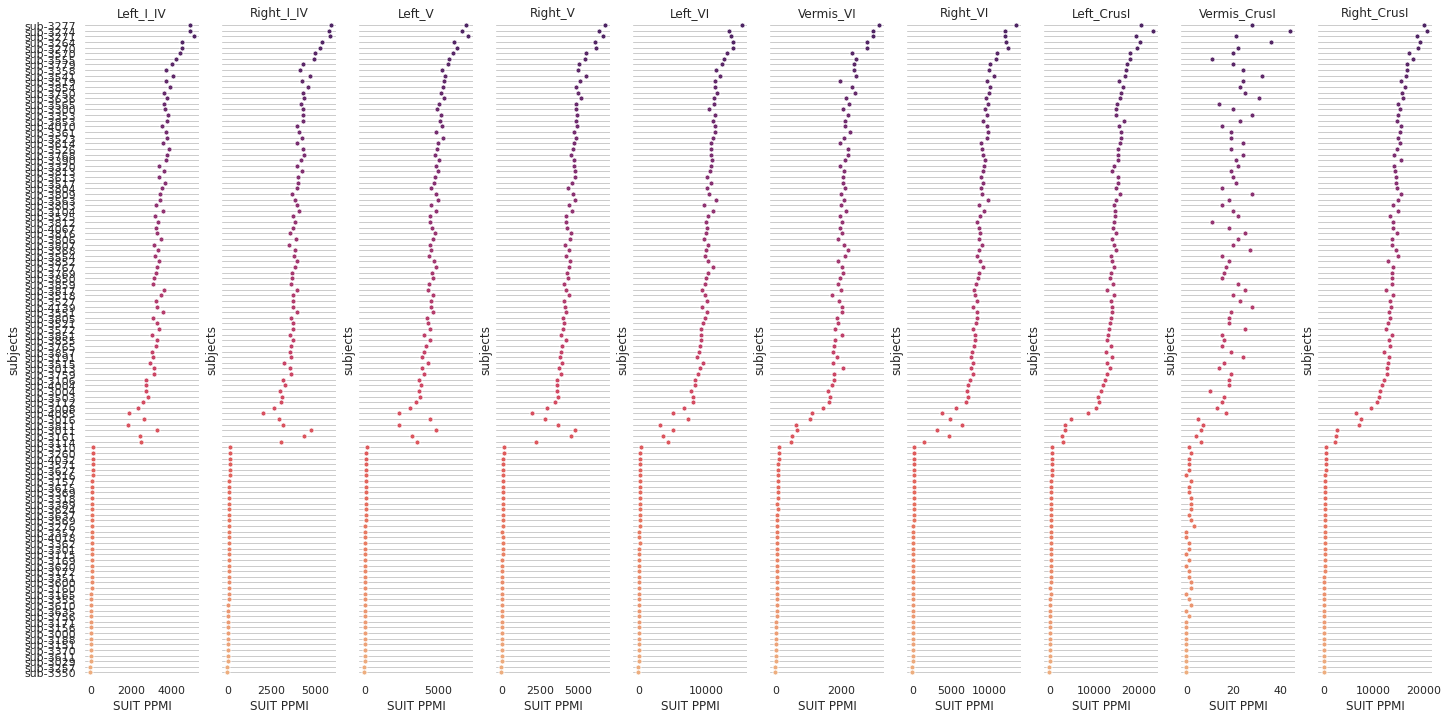

In [4]:
# visualzie check for PPMI and ADNI
visdf=suit_res_dfs[1].copy()
visdf['participant']=visdf.index
import seaborn as sns
sns.set_theme(style="whitegrid")
# Make the PairGrid
g = sns.PairGrid(visdf.sort_values("suit_total", ascending=False),
                 x_vars=visdf.columns[:10], y_vars=['participant'], height=10, aspect=.2)
# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=5, orient="h", jitter=False, palette="flare_r", linewidth=0.8, edgecolor="w")
# Use the same x axis limits on all columns and add better labels
g.set(xlabel="SUIT PPMI", ylabel="subjects")
# Use semantically meaningful titles for the columns
titles = visdf.columns[:10]
for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)

In [5]:
print(visdf[visdf['Left_I_IV']<1000].index)

Index(['sub-3000', 'sub-3029', 'sub-3115', 'sub-3151', 'sub-3156', 'sub-3157',
       'sub-3160', 'sub-3165', 'sub-3169', 'sub-3171', 'sub-3172', 'sub-3188',
       'sub-3257', 'sub-3260', 'sub-3276', 'sub-3301', 'sub-3310', 'sub-3316',
       'sub-3318', 'sub-3350', 'sub-3351', 'sub-3355', 'sub-3357', 'sub-3362',
       'sub-3369', 'sub-3370', 'sub-3389', 'sub-3569', 'sub-3571', 'sub-3600',
       'sub-3610', 'sub-3611', 'sub-3615', 'sub-3620', 'sub-3624', 'sub-3627',
       'sub-3635', 'sub-3637', 'sub-3756', 'sub-4018', 'sub-4032'],
      dtype='object', name='participant_id')


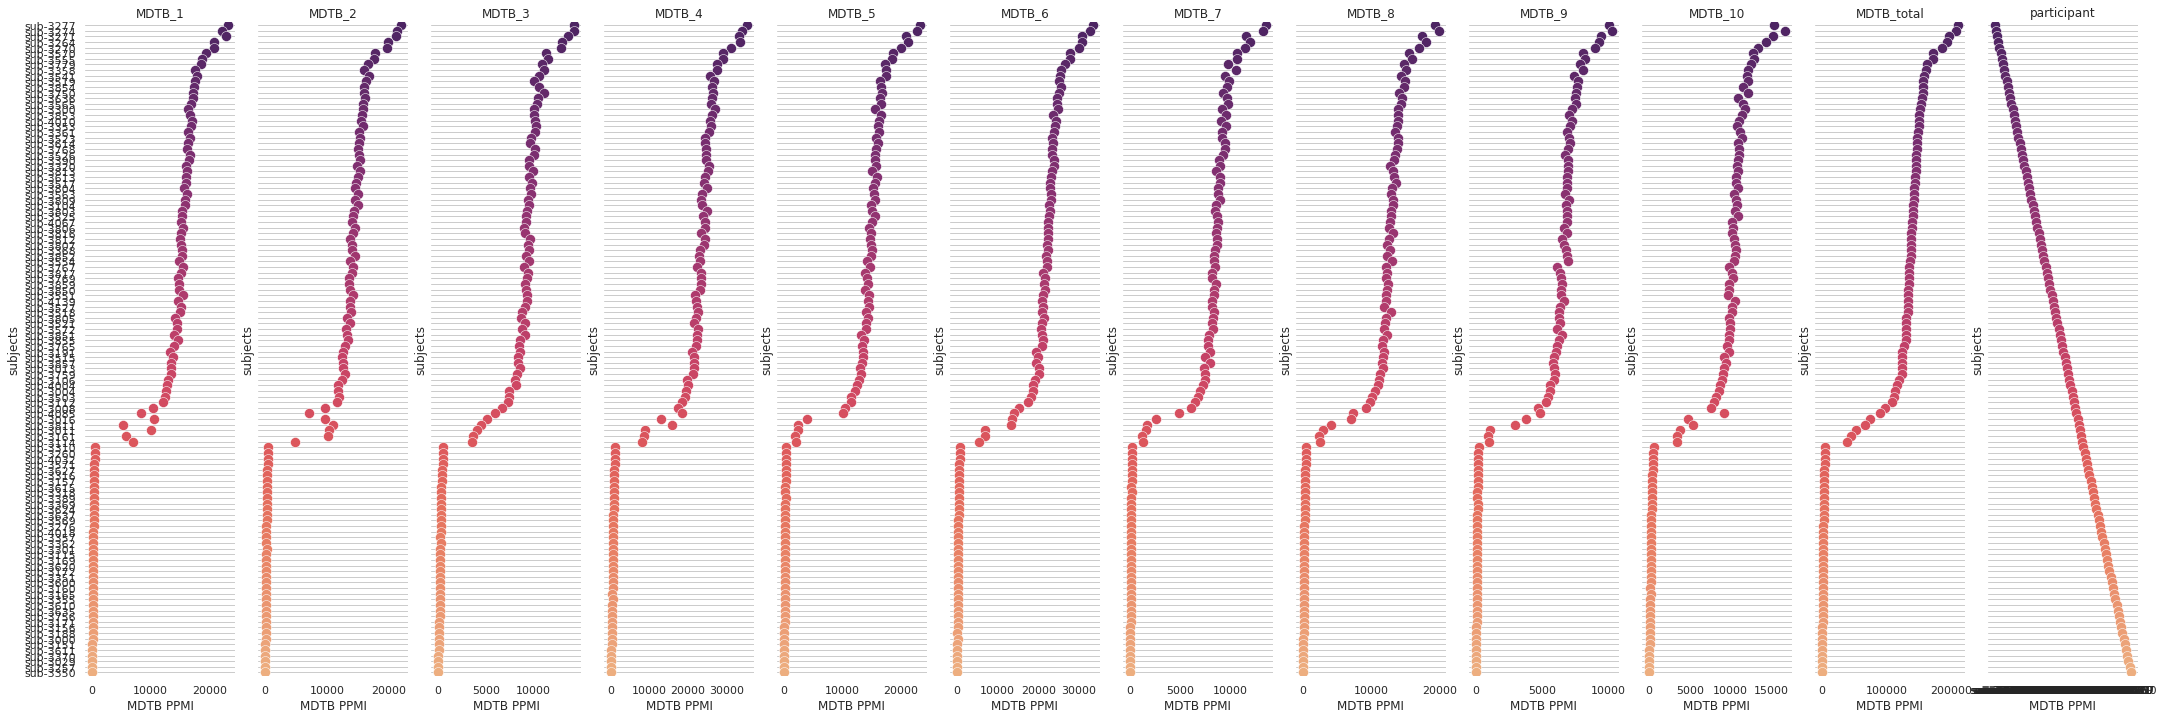

In [41]:
# visualzie check for PPMI and ADNI
visdf=MDTB_res_dfs[1].copy()
visdf['participant']=visdf.index
import seaborn as sns
sns.set_theme(style="whitegrid")
# Make the PairGrid
g = sns.PairGrid(visdf.sort_values("MDTB_total", ascending=False),
                 x_vars=visdf.columns, y_vars=['participant'], height=10, aspect=.25)
# Draw a dot plot using the stripplot function
g.map(sns.stripplot,size=10, orient="h", jitter=False, palette="flare_r", linewidth=0.5, edgecolor="w")
# Use the same x axis limits on all columns and add better labels
g.set(xlabel="MDTB PPMI", ylabel="subjects")
# Use semantically meaningful titles for the columns
titles = visdf.columns
for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)

Index(['age', 'sex', 'group', 'Left-Lateral-Ventricle', 'Left-Inf-Lat-Vent',
       'Left-Cerebellum-White-Matter', 'Left-Cerebellum-Cortex',
       'Left-Thalamus-Proper', 'Left-Caudate', 'Left-Putamen',
       ...
       'MDTB_2', 'MDTB_3', 'MDTB_4', 'MDTB_5', 'MDTB_6', 'MDTB_7', 'MDTB_8',
       'MDTB_9', 'MDTB_10', 'MDTB_total'],
      dtype='object', length=482)

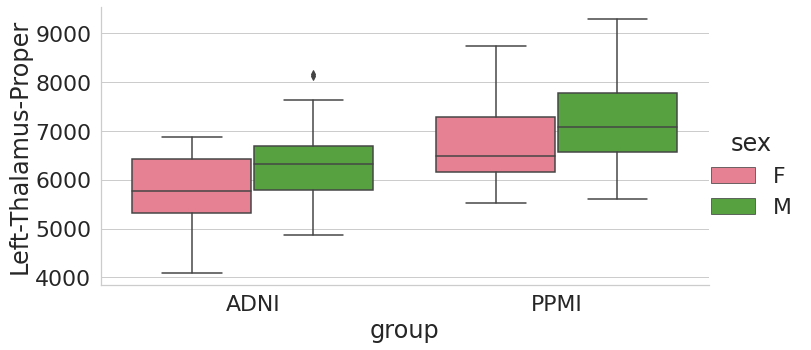

In [15]:
des_vis=all_data['Des'].copy()
display(des_vis.columns)
sns.set(font_scale=2)
palette = sns.color_palette('husl',3)
with sns.axes_style("whitegrid"):
    g = sns.catplot(y='Left-Thalamus-Proper', x='group', hue='sex', kind='box',aspect=2, height=5, palette = palette,
                    data=des_vis)
#    if normalize:
#        plt.ylabel('Volume (TBV %)')

In [26]:

#remove problematic subjects
#all_data=all_data.drop(index='sub_0073'); # only left brain NC
#all_data=all_data.drop(index='sub_0064'); # super large head normal control, NC
#all_data.columns

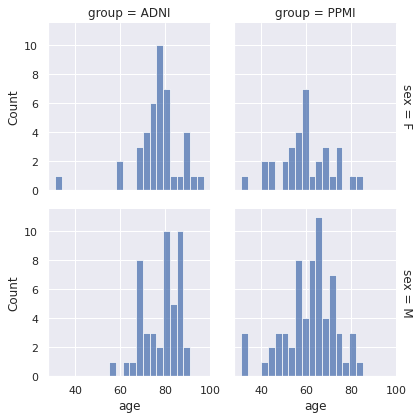

In [4]:
#plot age/sex/diagnosis distributions 2*3
sns.set_theme(style="darkgrid")
sns.displot(
    all_data['Des'], x="age", col="group", row="sex", 
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

In [5]:
#save data
all_data['Des'].to_csv(res_file[0])
all_data['DKT'].to_csv(res_file[1])